In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [2]:
Project=pd.read_csv("Test_data.csv")

In [3]:
Project

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [4]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [5]:
Project.shape

(23490, 13)

In [6]:
Project.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [7]:
Project['education'] = Project['education'].fillna('Unknown')

In [8]:
Project.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
Project['previous_year_rating'] = Project['previous_year_rating'].fillna(Project['previous_year_rating'].median())

In [10]:
Project.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [11]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [12]:
rename_map = {
    "KPIs_met >80%": "kpis_met_80",
    "awards_won?": "awards_won",
}
Project = Project.rename(columns={k: v for k, v in rename_map.items() if k in Project.columns})

In [13]:
Project.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpis_met_80', 'awards_won', 'avg_training_score'],
      dtype='object')

In [14]:
Project.duplicated().sum()

0

In [15]:
Project['Performance_Score'] = (
    Project['kpis_met_80'] * 0.30 +
    Project['previous_year_rating'] * 0.25 +
    Project['avg_training_score'] * 0.20 +
    Project['awards_won'] * 0.10 +
    Project['no_of_trainings'] * 0.10 +
    Project['length_of_service'] * 0.05
)

In [16]:
Project

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_80,awards_won,avg_training_score,Performance_Score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,16.60
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,11.30
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,9.95
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,14.25
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,13.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,13.10
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,16.00
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,11.30
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,15.10


In [17]:
Project['Performance_Score'].head()

0    16.60
1    11.30
2     9.95
3    14.25
4    13.65
Name: Performance_Score, dtype: float64

In [18]:
Project['Performance_Score'].tail()

23485    13.1
23486    16.0
23487    11.3
23488    15.1
23489    19.9
Name: Performance_Score, dtype: float64

In [19]:
def performance_rating(score):
    if score >= 16.5:
        return 'High'
    elif score >= 12.1:
        return 'Medium'
    else:
        return 'Low'

Project['Performance_Rating'] = Project['Performance_Score'].apply(performance_rating)

In [20]:
Project

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_80,awards_won,avg_training_score,Performance_Score,Performance_Rating
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,16.60,High
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,11.30,Low
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,9.95,Low
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,14.25,Medium
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,13.65,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,13.10,Medium
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,16.00,Medium
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,11.30,Low
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,15.10,Medium


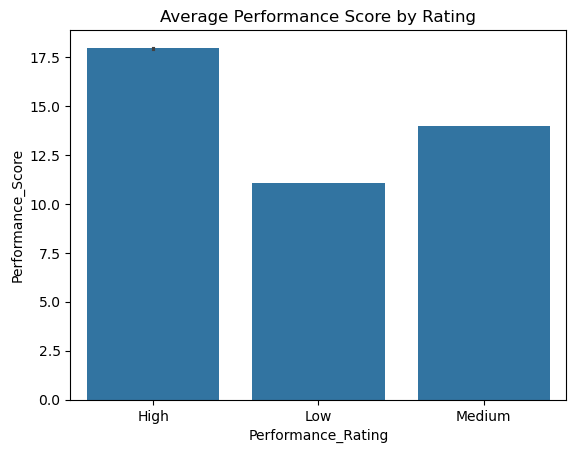

In [21]:
sns.barplot(x='Performance_Rating', y='Performance_Score', data=Project)
plt.title("Average Performance Score by Rating")
plt.show()

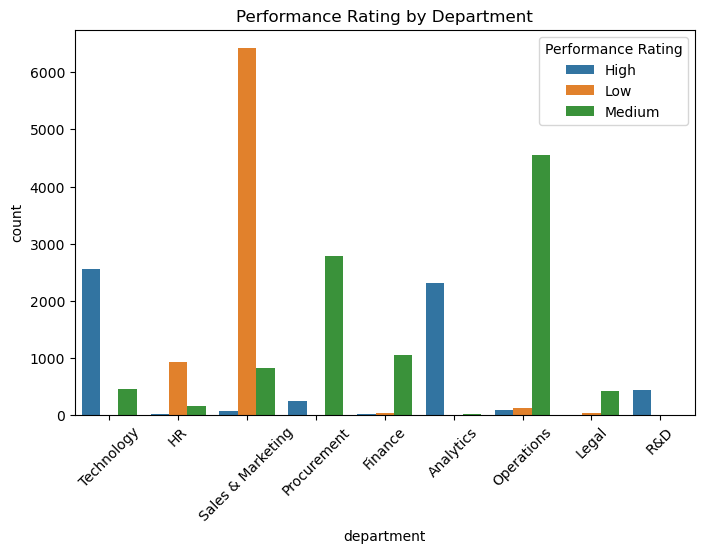

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='department',
    hue='Performance_Rating',
    data=Project)
plt.title("Performance Rating by Department")
plt.xticks(rotation=45)
plt.legend(title='Performance Rating')
plt.show()

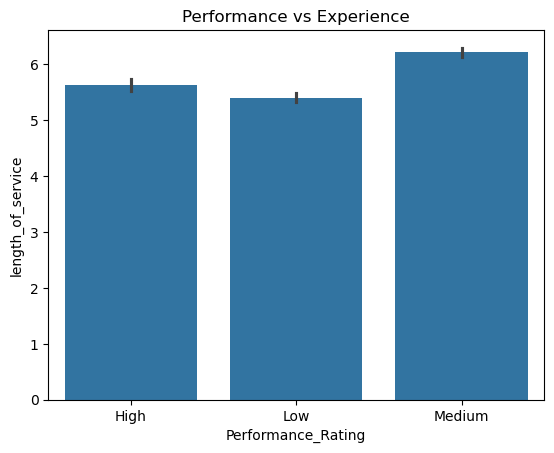

In [23]:
sns.barplot(x='Performance_Rating', y='length_of_service', data=Project)
plt.title("Performance vs Experience")
plt.show()

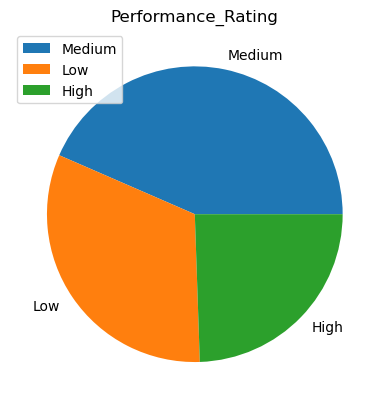

In [24]:
Project["Performance_Rating"].value_counts().plot(kind="pie",legend=True)
plt.title("Performance_Rating")
plt.ylabel("")
plt.show()

In [25]:
Project['Performance_Rating'].value_counts().reset_index()

,Performance_Rating,count
0,Medium,10211
1,Low,7534
2,High,5745


In [26]:
Project['gender'].value_counts().reset_index()

,gender,count
0,m,16596
1,f,6894


Text(0, 0.5, 'Number of Employees')

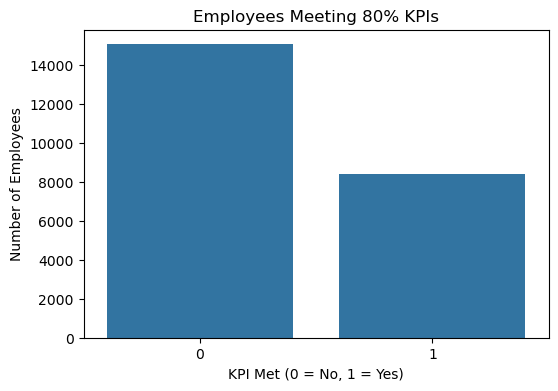

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='kpis_met_80', data=Project)

plt.title('Employees Meeting 80% KPIs')
plt.xlabel('KPI Met (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')

In [28]:
Project.groupby('education')['Performance_Score'].mean().sort_values(ascending=False)

education
Master's & above    14.270710
Below Secondary     14.269251
Bachelor's          13.964453
Unknown             12.888540
Name: Performance_Score, dtype: float64

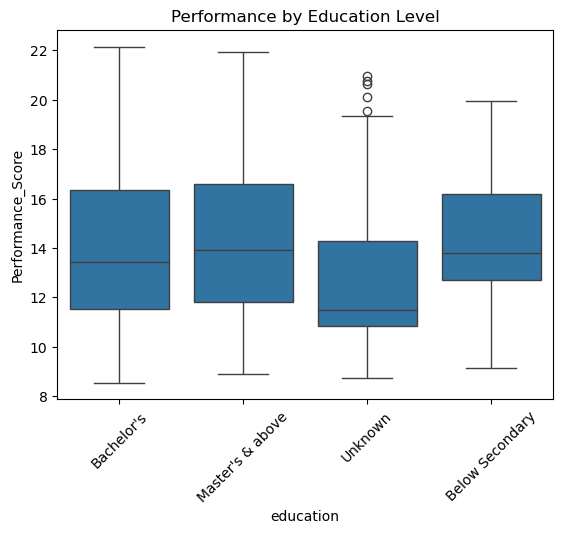

In [29]:
sns.boxplot(x='education', y='Performance_Score', data=Project)
plt.xticks(rotation=45)
plt.title("Performance by Education Level")
plt.show()

In [30]:
Project.groupby(["department","Performance_Rating"])["kpis_met_80"].mean().reset_index()

,department,Performance_Rating,kpis_met_80
0,Analytics,High,0.405546
1,Analytics,Medium,0.090909
2,Finance,High,0.647059
3,Finance,Low,0.166667
4,Finance,Medium,0.399425
5,HR,High,0.846154
6,HR,Low,0.309189
7,HR,Medium,0.557823
8,Legal,High,0.000000
9,Legal,Low,0.038462


In [31]:
df_numeric = Project.select_dtypes(include=["number"])

In [32]:
df_numeric.corr()["Performance_Score"].sort_values(ascending=False)

Performance_Score       1.000000
avg_training_score      0.987617
previous_year_rating    0.189082
kpis_met_80             0.154669
awards_won              0.083076
no_of_trainings         0.056939
length_of_service       0.046067
age                     0.015236
employee_id            -0.010974
Name: Performance_Score, dtype: float64

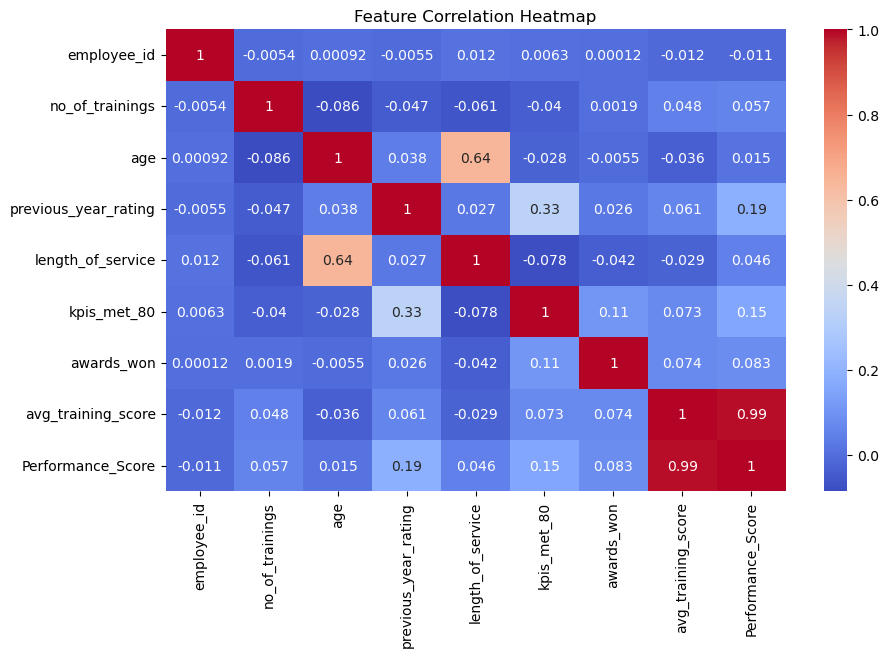

In [33]:
num_cols = Project.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [51]:
#Model Building 
Project['Performance_Target'] = Project['Performance_Rating'].map({
    'High': 2,
    'Medium': 1,
    'Low': 0})

In [35]:
from sklearn.preprocessing import LabelEncoder

cat_cols = Project.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    Project[col] = le.fit_transform(Project[col].astype(str))

In [36]:
X = Project[['avg_training_score',
             'previous_year_rating',
             'kpis_met_80',
             'awards_won']]

y = Project['Performance_Target']

In [37]:
X = X.fillna(X.median())
y = y.fillna(y.mode()[0])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18792, 4), (4698, 4), (18792,), (4698,))

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()}

def apply_scaler(scaler, X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [41]:
pip install xgboost catboost lightgbm

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [46]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

models = {'XGBoost': XGBClassifier(
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42),
    'CatBoost': CatBoostClassifier(
        verbose=0,
        random_state=42),
    'LightGBM': LGBMClassifier(
        random_state=42)}

In [47]:
models

{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x7a43b3ae8b20>,
 'LightGBM': LGBMClassifier(random_state=42)}

In [48]:
results = []

for scaler_name, scaler in scalers.items():
    X_train_scaled, X_test_scaled = apply_scaler(scaler, X_train, X_test)
    
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Accuracy': acc,
            'Confusion_Matrix': cm
        })
        
        print(f"\nScaler: {scaler_name} | Model: {model_name}")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", cm)
        print(classification_report(y_test, y_pred))


/home/03f1fdf2-b515-4521-8e46-f0835d53c1b2/.local/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [11:18:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Scaler: StandardScaler | Model: XGBoost
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weighted avg       0.97      0.97      0.97      4698


Scaler: StandardScaler | Model: CatBoost
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weig

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/03f1fdf2-b515-4521-8e46-f0835d53c1b2/.local/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [11:18:18] WARNING: /workspace/src/learner.cc:790: 
P


Scaler: StandardScaler | Model: LightGBM
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weighted avg       0.97      0.97      0.97      4698


Scaler: MinMaxScaler | Model: XGBoost
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weight

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/03f1fdf2-b515-4521-8e46-f0835d53c1b2/.local/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [11:18:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Scaler: MinMaxScaler | Model: LightGBM
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weighted avg       0.97      0.97      0.97      4698


Scaler: RobustScaler | Model: XGBoost
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weighted

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/03f1fdf2-b515-4521-8e46-f0835d53c1b2/.local/lib/python3.10/site-packages/xgboost/training.py:199: UserWarning: [11:18:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Scaler: RobustScaler | Model: LightGBM
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weighted avg       0.97      0.97      0.97      4698


Scaler: MaxAbsScaler | Model: XGBoost
Accuracy: 0.9716900808854831
Confusion Matrix:
 [[1474   33    0]
 [  55 1968   19]
 [   0   26 1123]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1507
           1       0.97      0.96      0.97      2042
           2       0.98      0.98      0.98      1149

    accuracy                           0.97      4698
   macro avg       0.97      0.97      0.97      4698
weighted

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [49]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False)

,Scaler,Model,Accuracy,Confusion_Matrix
0,StandardScaler,XGBoost,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
1,StandardScaler,CatBoost,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
2,StandardScaler,LightGBM,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
3,MinMaxScaler,XGBoost,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
4,MinMaxScaler,CatBoost,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
5,MinMaxScaler,LightGBM,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
6,RobustScaler,XGBoost,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
7,RobustScaler,CatBoost,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
8,RobustScaler,LightGBM,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"
9,MaxAbsScaler,XGBoost,0.97169,"[[1474, 33, 0], [55, 1968, 19], [0, 26, 1123]]"


In [ ]:
#✔ Best Scaling Function:
#Any scaler (no impact)
#Chosen: StandardScaler (industry standard)
#✔ Best Model:
#XGBoost / CatBoost / LightGBM
#All performed equally well (97.17% accuracy)